In [1]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2

In [11]:
train_paths = ["/scratch/as3ek/chrc_data_case_preserved_2000/valid/Normal/"]

In [12]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [13]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [14]:
# choose target image
target_image = staintools.read_image("/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-02_05___1000_1000.jpg")
standard_target_image = standardizer.transform(target_image)

In [15]:
# fit the normalizer
stain_normalizer.fit(standard_target_image)

In [16]:
i1 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/EE/108___0_4000.jpg')
i2 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Celiac/C03-05_06___1000_5000.jpg')
i3 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-01_01___4000_6050.jpg')
i4 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-02_05___1000_1000.jpg')
i5 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/EE/130365_6716_001___3633_5000.jpg')

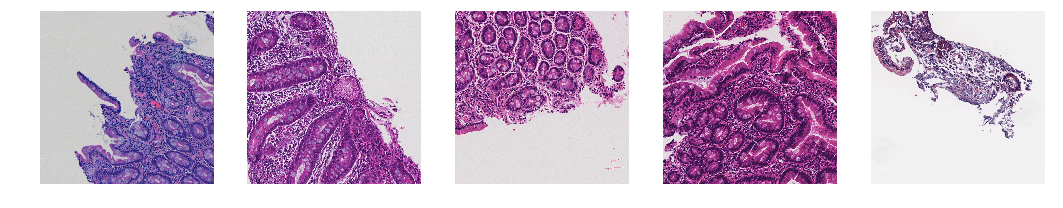

In [17]:
images = [i1, i2, i3, i4, i5]
titles = ["Target"] + ["Original"] * 4
staintools.plot_image_stack(images, width=5)

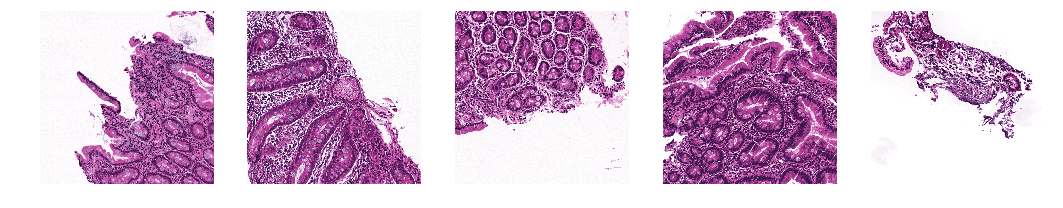

In [18]:
# Normalize to stain of first image
i1 = standardizer.transform(i1)
i2 = standardizer.transform(i2)
i3 = standardizer.transform(i3)
i4 = standardizer.transform(i4)
i5 = standardizer.transform(i5)

i1_normalized = stain_normalizer.transform(i1)
i2_normalized = stain_normalizer.transform(i2)
i3_normalized = stain_normalizer.transform(i3)
i4_normalized = stain_normalizer.transform(i4)
i5_normalized = stain_normalizer.transform(i5)

# Plot
images = [i1_normalized, i2_normalized, i3_normalized, i4_normalized, i5_normalized]
titles = ["Target standardized"] + ["Original standardized"] * 4
staintools.plot_image_stack(images, width=5)

In [19]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('chrc_data_case_preserved_2000', 'chrc_data_case_preserved_2000_normal')
    path_change_map[key] = temp

count = 0
for key in images_by_folder.keys():
    for value in images_by_folder[key]:
        source_img_path = str(key) + '/' + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + '/' + str(value) + '.jpg'
        img = staintools.read_image(source_img_path)
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path
        cv2.imwrite(dest_img_path, img_normalized)
        count += 1
        print(value + ' Saved! Count: ' + str(count))

N16-47_01___2000_2000 Saved! Count: 1
N16-36_02___4000_3000 Saved! Count: 2
N16-36_01___4000_4000 Saved! Count: 3
N16-36_02___1000_5000 Saved! Count: 4
N16-47_02___3000_4000 Saved! Count: 5
N17-58_04___5000_0 Saved! Count: 6
N15-33_03___6000_4000 Saved! Count: 7
N16-36_01___0_3000 Saved! Count: 8
N17-50_02___3000_1000 Saved! Count: 9
N15-21_05___4000_7000 Saved! Count: 10
N15-33_03___4000_2000 Saved! Count: 11
N15-23_03___1000_5000 Saved! Count: 12
N14-08_04___0_1000 Saved! Count: 13
N17-50_02___1000_4000 Saved! Count: 14
N14-08_05___1000_1000 Saved! Count: 15
N15-33_03___5000_1000 Saved! Count: 16
N17-58_04___4000_4000 Saved! Count: 17
N17-65_00___1733_2000 Saved! Count: 18
N17-58_02___3000_5000 Saved! Count: 19
N16-36_01___4000_2000 Saved! Count: 20
N14-08_02___3227_6000 Saved! Count: 21
N15-33_01___4000_0 Saved! Count: 22
N17-50_01___3000_1000 Saved! Count: 23
N15-33_04___1000_3000 Saved! Count: 24
N17-58_03___6000_1000 Saved! Count: 25
N14-04_02___11000_4000 Saved! Count: 26
N15-21